# Logistic Regression

It is a technique that determine the replationship between a dependent and one or more independent variable, where the dependent variable is a dichotomous categorical value 

Produces S shaped regression prediction 

the left hand side of this equation is what is called log odds

logit(p)=b0 + b1X1 + b2X2 + b3X3+...bnXn

### Data prepaprations
- Missing value imputation
- Outlier treatment
- Dummy variable creation for categorical vale
- test-train split of the data
- Standardization of scales of continuous variables

### Metrics
- Sensitivity(TPR) = TP/TP+FN
- Specificity = TN/TN+FP
- FPR = FP/TN+FP
- Precision = TP/TP+FP
- Recall = TP/TP+FN

### Variable transformation

- Dummy Variable Transformation
- Weight of Evidence(WOE) Transformation
- Continuous varibale Transformation
- Mathematical Transformation
- Principla Component Analysis

## WOE
There are three important things about WOE
- calculating woe values for fine binning and coarse binning
- Importance of woe for fine binning and coarse binning
- Usage of woe transformation

- In-sample validation: You split the original data into two parts, training and test data
- Out-time validation: It makes sense to actually test the model on data that is from same other time
- K-fold cross Validation: Evaluation of the sample is done for k-iteration

# Telecom Churn Case Study

WIth 21 predictor variable we need to predict whether a particular customers will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd, numpy as np

In [3]:
churn_d=pd.read_csv("churn_data.csv")

In [4]:
inter_d=pd.read_csv("internet_data.csv")

In [5]:
cust_d=pd.read_csv("customer_data.csv")

In [6]:
churn_d.describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [7]:
churn_d.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
churn_d.shape

(7043, 9)

In [9]:
churn_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


In [10]:
inter_d.describe()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,3,3,3,3,3,3,3,3
top,7590-VHVEG,No,Fiber optic,No,No,No,No,No,No
freq,1,3390,3096,3498,3088,3095,3473,2810,2785


In [11]:
inter_d.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [12]:
inter_d["OnlineSecurity"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [13]:
inter_d.shape

(7043, 9)

In [14]:
inter_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   MultipleLines     7043 non-null   object
 2   InternetService   7043 non-null   object
 3   OnlineSecurity    7043 non-null   object
 4   OnlineBackup      7043 non-null   object
 5   DeviceProtection  7043 non-null   object
 6   TechSupport       7043 non-null   object
 7   StreamingTV       7043 non-null   object
 8   StreamingMovies   7043 non-null   object
dtypes: object(9)
memory usage: 495.3+ KB


In [15]:
cust_d.describe()

,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [16]:
cust_d.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [17]:
cust_d.shape

(7043, 5)

In [18]:
cust_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [19]:
df_1=pd.merge(churn_d,cust_d,how="inner",on="customerID")

In [20]:
telecom=pd.merge(df_1,inter_d,how="inner",on="customerID")

In [21]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [22]:
telecom.shape

(7043, 21)

In [23]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [24]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [25]:
varlist=["PhoneService","PaperlessBilling","Churn","Partner","Dependents"]

In [26]:
def binary_data(x):
    return x.map({"Yes":1,"No":0})

In [27]:
telecom[varlist]=telecom[varlist].apply(binary_data)

In [28]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [29]:
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']],drop_first=True)

telecom = pd.concat([telecom, dummy1], axis =1)

In [30]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,False,False,False,True,False,False,False,False
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,True,False,False,False,True,True,False,False
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,False,False,False,False,True,True,False,False
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,True,False,False,False,False,True,False,False
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,False,False,False,True,False,False,True,False


In [31]:
ml=pd.get_dummies(telecom[["MultipleLines"]], prefix="MultipleLines")
ml1=ml.drop(["MultipleLines_No phone service"],axis=1)
telecom=pd.concat([telecom,ml1],axis=1)

In [32]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,False,False,False,True,False,False,False,False,False,False
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,True,False,False,False,True,True,False,False,True,False
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,False,False,False,False,True,True,False,False,True,False
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,False,False,False,True,False,False,True,False,True,False


In [33]:
os=pd.get_dummies(telecom[["OnlineSecurity"]], prefix="OnlineSecurity")
os1=os.drop(["OnlineSecurity_No internet service"],axis=1)
telecom=pd.concat([telecom,os1],axis=1)

In [34]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,False,True,False,False,False,False,False,False,True,False
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,False,False,True,True,False,False,True,False,False,True
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,False,False,True,True,False,False,True,False,False,True
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,False,False,False,True,False,False,False,False,False,True
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,False,True,False,False,True,False,True,False,True,False


In [35]:
ob=pd.get_dummies(telecom[["OnlineBackup"]], prefix="OnlineBackup")
ob1=ob.drop(["OnlineBackup_No internet service"],axis=1)
telecom=pd.concat([telecom,ob1],axis=1)

In [36]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,False,False,False,False,False,False,True,False,False,True
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,True,True,False,False,True,False,False,True,True,False
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,True,True,False,False,True,False,False,True,False,True
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,False,True,False,False,False,False,False,True,True,False
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,False,False,True,False,True,False,True,False,True,False


In [37]:
dp=pd.get_dummies(telecom[["DeviceProtection"]], prefix="DeviceProtection")
dp1=dp.drop(["DeviceProtection_No internet service"],axis=1)
telecom=pd.concat([telecom,dp1],axis=1)

In [38]:
ts=pd.get_dummies(telecom[["TechSupport"]], prefix="TechSupport")
ts1=ts.drop(["TechSupport_No internet service"],axis=1)
telecom=pd.concat([telecom,ts1],axis=1)

In [39]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,False,False,True,False,False,True,True,False,True,False
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,True,False,False,True,True,False,False,True,True,False
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,True,False,False,True,False,True,True,False,True,False
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,False,False,False,True,True,False,False,True,False,True
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,True,False,True,False,True,False,True,False,True,False


In [40]:
st=pd.get_dummies(telecom[["StreamingTV"]], prefix="StreamingTV")
st1=st.drop(["StreamingTV_No internet service"],axis=1)
telecom=pd.concat([telecom,st1],axis=1)

In [41]:
sm=pd.get_dummies(telecom[["StreamingMovies"]], prefix="StreamingMovies")
sm1=sm.drop(["StreamingMovies_No internet service"],axis=1)
telecom=pd.concat([telecom,sm1],axis=1)

In [42]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,False,True,True,False,True,False,True,False,True,False
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,True,False,False,True,True,False,True,False,True,False
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,False,True,True,False,True,False,True,False,True,False
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,True,False,False,True,False,True,True,False,True,False
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,True,False,True,False,True,False,True,False,True,False


In [43]:
for i in list(telecom.columns):
    print(i,"\n",telecom[i].unique())

customerID 
 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
tenure 
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService 
 [0 1]
Contract 
 ['Month-to-month' 'One year' 'Two year']
PaperlessBilling 
 [1 0]
PaymentMethod 
 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges 
 [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges 
 ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn 
 [0 1]
gender 
 ['Female' 'Male']
SeniorCitizen 
 [0 1]
Partner 
 [1 0]
Dependents 
 [0 1]
MultipleLines 
 ['No phone service' 'No' 'Yes']
InternetService 
 ['DSL' 'Fiber optic' 'No']
OnlineSecurity 
 ['No' 'Yes' 'No internet service']
OnlineBackup 
 ['Yes' 'No' 'No internet service']
DeviceProtection 
 ['No' 'Yes' 'No inte

In [44]:
list(telecom.columns)

['customerID',
 'tenure',
 'PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'gender_Male',
 'InternetService_Fiber optic',
 'InternetService_No',
 'MultipleLines_No',
 'MultipleLines_Yes',
 'OnlineSecurity_No',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_Yes']

In [45]:
telecom.shape

(7043, 43)

In [46]:
telecom=telecom.drop(["Contract","MultipleLines",
                     'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],axis=1)

In [47]:
telecom.shape

(7043, 34)

In [48]:
telecom=telecom.drop(["PaymentMethod","gender"],axis=1)

In [49]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   bool   
 11  Cont

In [50]:
telecom["TotalCharges"]=pd.to_numeric(telecom["TotalCharges"],errors="coerce")

In [51]:
print(telecom["TotalCharges"].dtype)

float64


In [52]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   bool   
 11  Cont

#### Outlier


In [53]:
num_telecom=telecom[["tenure","MonthlyCharges","SeniorCitizen","TotalCharges"]]

In [54]:
num_telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

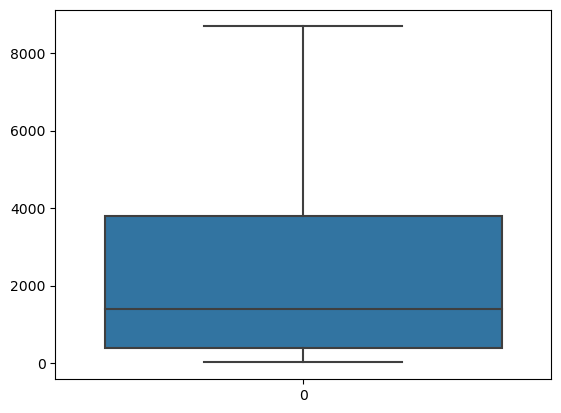

In [56]:

sns.boxplot(num_telecom["TotalCharges"])


<Axes: >

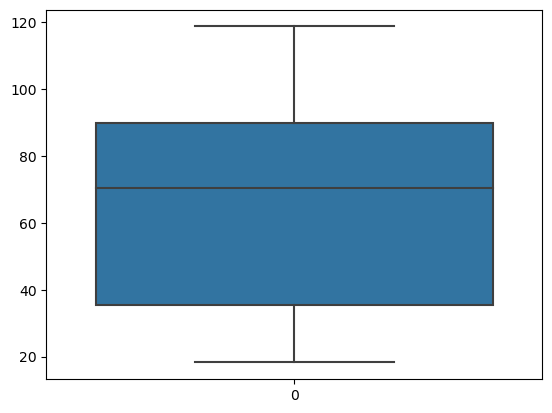

In [57]:
sns.boxplot(num_telecom["MonthlyCharges"])

<Axes: >

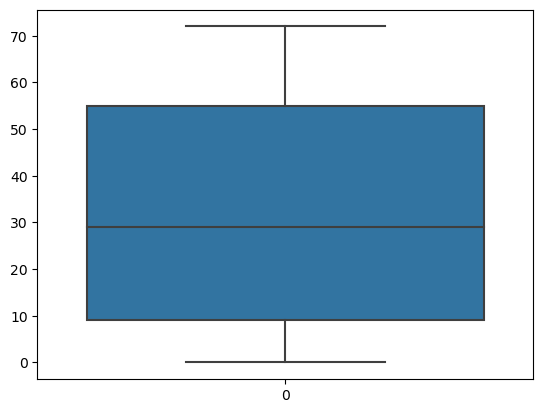

In [58]:
sns.boxplot(num_telecom["tenure"])

In [59]:
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [60]:
round((telecom.isnull().sum()/len(telecom.index))*100,2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [61]:
telecom=telecom[~np.isnan(telecom["TotalCharges"])]

In [62]:
round((telecom.isnull().sum()/len(telecom.index))*100,2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

<Axes: >

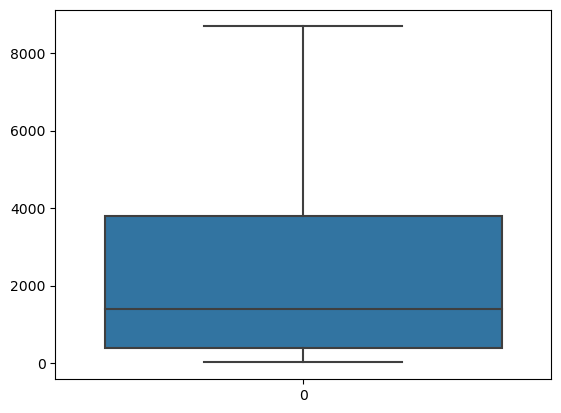

In [63]:
sns.boxplot(num_telecom["TotalCharges"])


In [64]:
telecom.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBacku

## Train-test split

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X=telecom.drop(["Churn","customerID"],axis=1)

In [67]:
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,False,False,...,False,True,True,False,True,False,True,False,True,False
1,34,1,0,56.95,1889.50,0,0,0,True,False,...,True,False,False,True,True,False,True,False,True,False
2,2,1,1,53.85,108.15,0,0,0,False,False,...,False,True,True,False,True,False,True,False,True,False
3,45,0,0,42.30,1840.75,0,0,0,True,False,...,True,False,False,True,False,True,True,False,True,False
4,2,1,1,70.70,151.65,0,0,0,False,False,...,True,False,True,False,True,False,True,False,True,False


In [68]:
y=telecom["Churn"]

In [69]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

## Feature Scaling

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler=StandardScaler()

In [73]:
X_train[["tenure","MonthlyCharges","TotalCharges"]]=scaler.fit_transform(X_train[["tenure","MonthlyCharges","TotalCharges"]])

In [74]:
telecom["Churn"].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [75]:
churn=(sum(telecom["Churn"])/len(telecom["Churn"].index)*100)

In [76]:
churn

26.578498293515356

## SUMMARY

Today we learned about logistic regression, its mathematical form, different evaluation metrics and variable transformation.
Then we were given three datasets,"churn_data.csv","customer_data.csv","internet_data.csv". We first merged them into one dataframe, then we preprocessed it by finding the outliers and then converted the categorical data into numeric data by creating dummies for each categorical attributes. and deleted the unnecesarry columns. Then we split the dataframe for testing and training. Then applied StandardScaler.fit_transform to transform the numerical discrete values to a uniform value.

## Looking for Correlation

In [77]:
%matplotlib inline

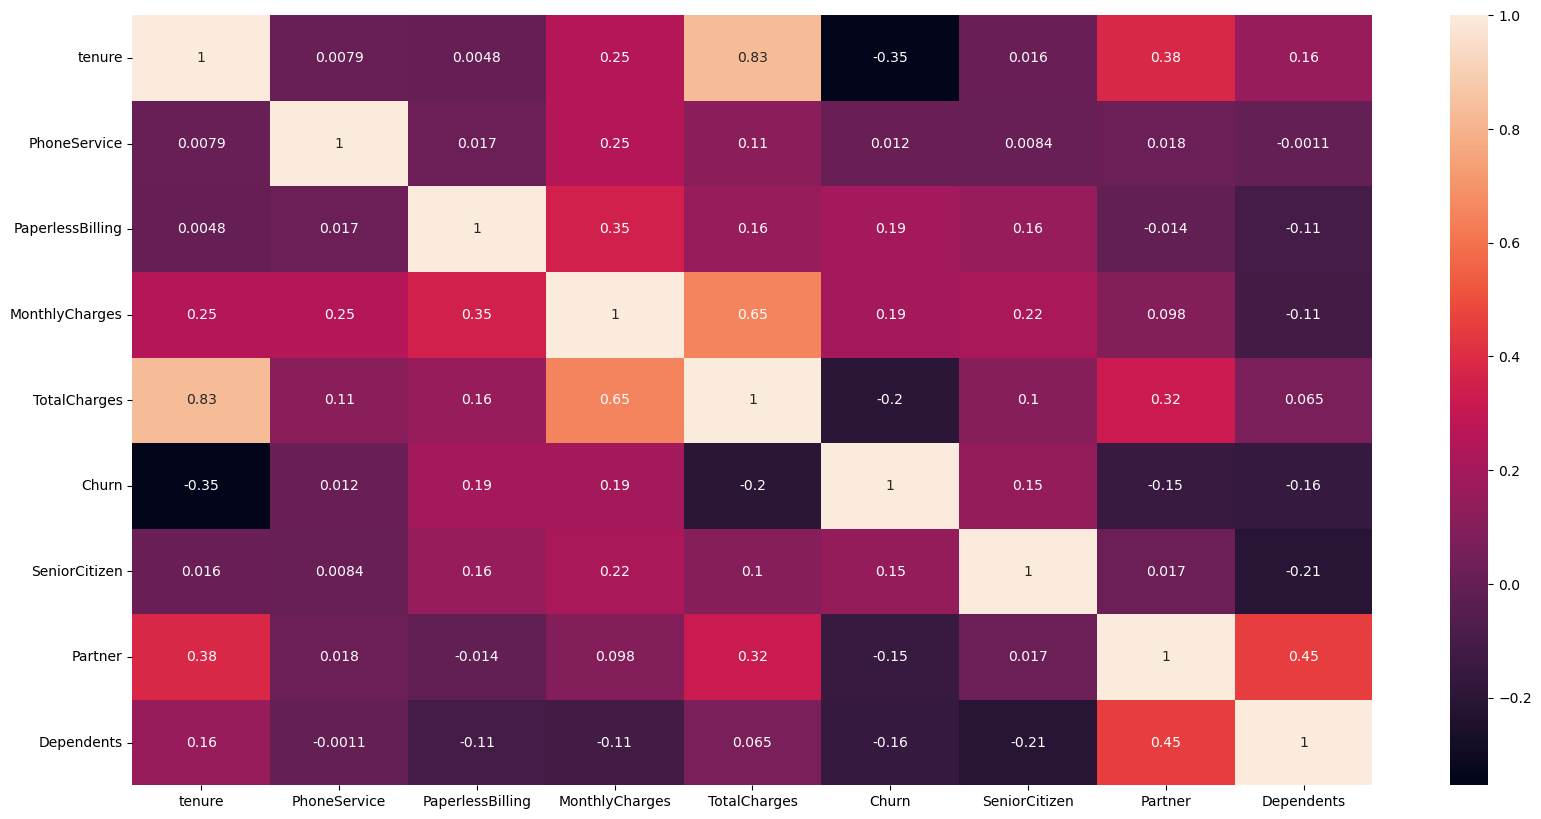

In [78]:
plt.figure(figsize=(20,10))
sns.heatmap(telecom.select_dtypes(include=["float","int"]).corr(),annot=True)
plt.show()

In [79]:
X_test=X_test.drop(["MultipleLines_No","OnlineSecurity_No","OnlineBackup_No","DeviceProtection_No","TechSupport_No"
                    ,"StreamingTV_No","StreamingMovies_No"],axis=1)
X_train=X_train.drop(["MultipleLines_No","OnlineSecurity_No","OnlineBackup_No","DeviceProtection_No","TechSupport_No"
                    ,"StreamingTV_No","StreamingMovies_No"],axis=1)

<Axes: >

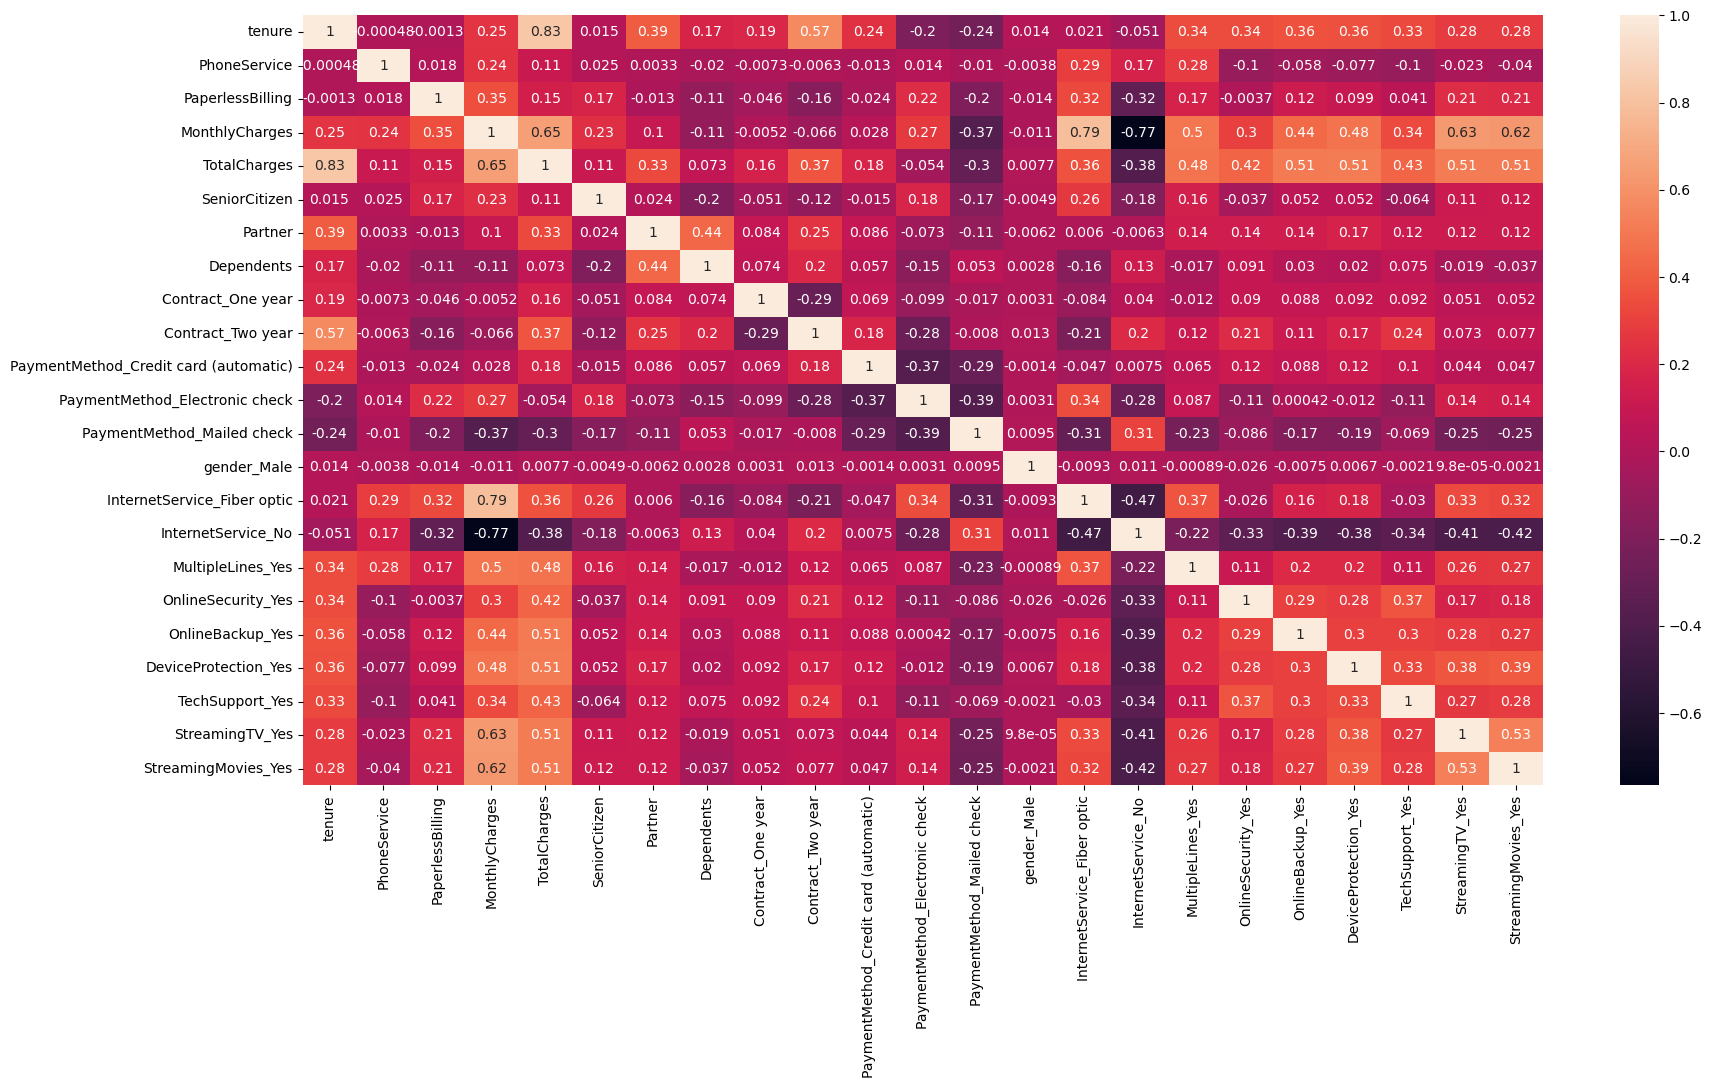

In [80]:
plt.figure(figsize=(20,10))

sns.heatmap(X_train.corr(),annot=True)

In [81]:
import statsmodels.api as sm

In [82]:
logm1=sm.GLM(y_train,(sm.add_constant(X_train.select_dtypes(include=["float","int"]))),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4913
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2120.0
Date:                Wed, 19 Jun 2024   Deviance:                       4240.0
Time:                        14:07:05   Pearson chi2:                 5.48e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2501
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.2142      0.152     -7.976      0.000      -1.513      -0.916
tenure              -1.6935      0.169     -9.998      0.000      -2.026      -1.362
PhoneService        -0.8236      0.143     -5.756      0.000      -1.104      -0.543
PaperlessBilling     0.5198      0.086      6.043      0.000       0.351       0.688
MonthlyCharges       0.8956      0.070     12.833      0.000       0.759       1.032
TotalCharges         0.3370      0.175      1.927      0.054      -0.006       0.680
SeniorCitizen        0.6667      0.098      6.768      0.000       0.474       0.860
Partner              0.0927      0.091      1.020      0.308      -0.085       0.271
Dependents          -0.3250      0.103     -3.144      0.002      -0.528      -0.122
====================================================================================
"""

In [83]:
help(sm.GLM)

Help on class GLM in module statsmodels.genmod.generalized_linear_model:

class GLM(statsmodels.base.model.LikelihoodModel)
 |  GLM(endog, exog, family=None, offset=None, exposure=None, freq_weights=None, var_weights=None, missing='none', **kwargs)
 |  
 |  Generalized Linear Models
 |  
 |  GLM inherits from statsmodels.base.model.LikelihoodModel
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      1d array of endogenous response variable.  This array can be 1d or 2d.
 |      Binomial family models accept a 2d array with two columns. If
 |      supplied, each observation is expected to be [success, failure].
 |  exog : array_like
 |      A nobs x k array where `nobs` is the number of observations and `k`
 |      is the number of regressors. An intercept is not included by default
 |      and should be added by the user (models specified using a formula
 |      include an intercept by default). See `statsmodels.tools.add_constant`.
 |  family : family class instance
 |    

In [84]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [85]:
from sklearn.feature_selection import RFE
rfe=RFE(estimator=logreg,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [86]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False, False,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
       False, False,  True,  True,  True])

In [87]:
rfe.ranking_

array([1, 3, 1, 1, 1, 1, 7, 6, 1, 1, 1, 4, 1, 8, 1, 1, 1, 2, 5, 9, 1, 1,
       1])

In [88]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', False, 3),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 7),
 ('Dependents', False, 6),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 4),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 8),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 2),
 ('OnlineBackup_Yes', False, 5),
 ('DeviceProtection_Yes', False, 9),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [89]:
col=X_train.columns[rfe.support_]

In [90]:
X_train.columns[~rfe.support_]

Index(['PhoneService', 'Partner', 'Dependents',
       'PaymentMethod_Electronic check', 'gender_Male', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes'],
      dtype='object')

In [91]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm.select_dtypes(include=["float","int"]), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4916
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2141.1
Date:                Wed, 19 Jun 2024   Deviance:                       4282.1
Time:                        14:07:06   Pearson chi2:                 5.37e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2436
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.0034      0.079    -25.300      0.000      -2.159      -1.848
tenure              -1.6200      0.166     -9.782      0.000      -1.945      -1.295
PaperlessBilling     0.5534      0.085      6.474      0.000       0.386       0.721
MonthlyCharges       0.8047      0.066     12.218      0.000       0.676       0.934
TotalCharges         0.2879      0.173      1.663      0.096      -0.051       0.627
SeniorCitizen        0.7525      0.097      7.796      0.000       0.563       0.942
====================================================================================
"""

In [92]:
help(sm.GLM)


Help on class GLM in module statsmodels.genmod.generalized_linear_model:

class GLM(statsmodels.base.model.LikelihoodModel)
 |  GLM(endog, exog, family=None, offset=None, exposure=None, freq_weights=None, var_weights=None, missing='none', **kwargs)
 |  
 |  Generalized Linear Models
 |  
 |  GLM inherits from statsmodels.base.model.LikelihoodModel
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      1d array of endogenous response variable.  This array can be 1d or 2d.
 |      Binomial family models accept a 2d array with two columns. If
 |      supplied, each observation is expected to be [success, failure].
 |  exog : array_like
 |      A nobs x k array where `nobs` is the number of observations and `k`
 |      is the number of regressors. An intercept is not included by default
 |      and should be added by the user (models specified using a formula
 |      include an intercept by default). See `statsmodels.tools.add_constant`.
 |  family : family class instance
 |    

In [93]:
y_train_pred=res.predict(X_train_sm.select_dtypes(include=["float","int"]))

In [94]:
help(res.predict)

Help on method predict in module statsmodels.base.model:

predict(exog=None, transform=True, *args, **kwargs) method of statsmodels.genmod.generalized_linear_model.GLMResults instance
    Call self.model.predict with self.params as the first argument.
    
    Parameters
    ----------
    exog : array_like, optional
        The values for which you want to predict. see Notes below.
    transform : bool, optional
        If the model was fit via a formula, do you want to pass
        exog through the formula. Default is True. E.g., if you fit
        a model y ~ log(x1) + log(x2), and transform is True, then
        you can pass a data structure that contains x1 and x2 in
        their original form. Otherwise, you'd need to log the data
        first.
    *args
        Additional arguments to pass to the model, see the
        predict method of the model for the details.
    **kwargs
        Additional keywords arguments to pass to the model, see the
        predict method of the mode

In [95]:
X_train_sm.columns

Index(['const', 'tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [96]:
y_train_pred

879     0.137808
5790    0.086987
6498    0.694485
880     0.748772
2784    0.747536
          ...   
79      0.030669
3934    0.196108
5964    0.043841
6947    0.094667
5649    0.031089
Length: 4922, dtype: float64

In [97]:
X_train_sm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4922 entries, 879 to 5649
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   const                                  4922 non-null   float64
 1   tenure                                 4922 non-null   float64
 2   PaperlessBilling                       4922 non-null   int64  
 3   MonthlyCharges                         4922 non-null   float64
 4   TotalCharges                           4922 non-null   float64
 5   SeniorCitizen                          4922 non-null   int64  
 6   Contract_One year                      4922 non-null   bool   
 7   Contract_Two year                      4922 non-null   bool   
 8   PaymentMethod_Credit card (automatic)  4922 non-null   bool   
 9   PaymentMethod_Mailed check             4922 non-null   bool   
 10  InternetService_Fiber optic            4922 non-null   bool   
 11  Interne

In [98]:
X_train_sm.head()

,const,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,1.0,0.019693,1,-0.338074,-0.276449,0,False,False,False,False,False,False,True,False,False,False
5790,1.0,0.305384,1,-0.464443,-0.112702,0,False,False,False,False,False,False,False,False,True,True
6498,1.0,-1.286319,1,0.581425,-0.974430,0,False,False,False,False,True,False,False,False,False,False
880,1.0,-0.919003,1,1.505913,-0.550676,0,False,False,False,False,True,False,False,True,True,True
2784,1.0,-1.163880,1,1.106854,-0.835971,0,False,False,False,False,True,False,False,True,True,True


In [99]:
y_train_pred=y_train_pred.values.reshape(-1)

In [100]:
y_train_pred

array([0.13780805, 0.08698681, 0.6944848 , ..., 0.04384104, 0.09466689,
       0.03108855])

In [101]:
y_train_pred_final=pd.DataFrame({"Churn":y_train.values,"Churn_Prob":y_train_pred})

In [102]:
y_train_pred_final["CustID"]=y_train.index

In [103]:
y_train_pred_final

,Churn,Churn_Prob,CustID
0,0,0.137808,879
1,0,0.086987,5790
2,1,0.694485,6498
3,1,0.748772,880
4,1,0.747536,2784
...,...,...,...
4917,0,0.030669,79
4918,0,0.196108,3934
4919,0,0.043841,5964
4920,0,0.094667,6947


In [104]:
y_train.values

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [105]:
  y_train_pred_final["predicted"]=y_train_pred_final.Churn_Prob.map(lambda x:1 if x>0.5 else 0)

In [106]:
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.137808,879,0
1,0,0.086987,5790,0
2,1,0.694485,6498,1
3,1,0.748772,880,1
4,1,0.747536,2784,1


In [107]:
predicted=(sum(y_train_pred_final["predicted"])/len(y_train_pred_final["predicted"])*100)

In [108]:
predicted

18.590004063388864

In [109]:
from sklearn import metrics

In [110]:
confusion=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted)

In [111]:
confusion

array([[3310,  325],
       [ 697,  590]], dtype=int64)

In [112]:
# Predicted   not_churn   churn
# Actual
# not_churn    3310        325
# churn        697         590

In [113]:
metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted)

0.7923608289313288

<Axes: >

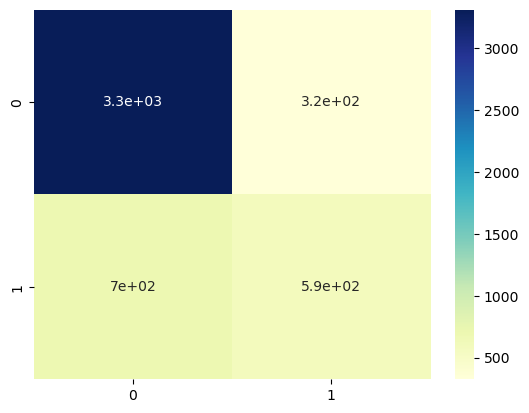

In [114]:
sns.heatmap(confusion,cmap="YlGnBu",annot=True)

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [116]:
vif=pd.DataFrame()
vif["Features"]=X_train[col].select_dtypes(include=["float","int"]).columns

In [117]:
vif["VIF"]=[variance_inflation_factor(X_train[col].select_dtypes(include=["float","int"]).values,i) for i in range(X_train[col].select_dtypes(include=["float","int"]).shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,TotalCharges,9.61
0,tenure,5.89
2,MonthlyCharges,3.34
1,PaperlessBilling,1.24
4,SeniorCitizen,1.22


In [118]:
col

Index(['tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [119]:
X_train_1=X_train[col].select_dtypes(include=["float","int"]).drop(["TotalCharges"],axis=1)

In [120]:
X_train_lm=sm.add_constant(X_train_1)

In [121]:
vif=pd.DataFrame()
vif["Features"]=X_train_1.select_dtypes(include=["float","int"]).columns
vif["VIF"]=[variance_inflation_factor(X_train_1.select_dtypes(include=["float","int"]).values,i) for i in range(X_train_1.select_dtypes(include=["float","int"]).shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,PaperlessBilling,1.24
3,SeniorCitizen,1.22
2,MonthlyCharges,1.15
0,tenure,1.07


In [122]:
X_train_sm = sm.add_constant(X_train_1)
logm2 = sm.GLM(y_train,X_train_sm.select_dtypes(include=["float","int"]), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4917
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2142.5
Date:                Wed, 19 Jun 2024   Deviance:                       4284.9
Time:                        14:07:08   Pearson chi2:                 5.09e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2432
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.9622      0.074    -26.426      0.000      -2.108      -1.817
tenure              -1.3611      0.051    -26.727      0.000      -1.461      -1.261
PaperlessBilling     0.5471      0.085      6.409      0.000       0.380       0.714
MonthlyCharges       0.8773      0.050     17.529      0.000       0.779       0.975
SeniorCitizen        0.7539      0.097      7.794      0.000       0.564       0.944
====================================================================================
"""

In [123]:
y_train_pred=res.predict(X_train_sm.select_dtypes(include=["float","int"])).values.reshape(-1)

In [124]:
y_train_pred

array([0.14950543, 0.09637127, 0.69969285, ..., 0.04892759, 0.08873695,
       0.03574469])

In [125]:
y_train_pred_final=pd.DataFrame({"Churn":y_train.values,"Churn_Prob":y_train_pred})

In [126]:
y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.149505
1,0,0.096371
2,1,0.699693
3,1,0.760768
4,1,0.757702


In [127]:
y_train_pred_final["CustID"]=y_train.index

In [128]:
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.149505,879
1,0,0.096371,5790
2,1,0.699693,6498
3,1,0.760768,880
4,1,0.757702,2784


In [129]:
  y_train_pred_final["predicted"]=y_train_pred_final.Churn_Prob.map(lambda x:1 if x>0.5 else 0)

In [130]:
predicted=(sum(y_train_pred_final["predicted"])/len(y_train_pred_final["predicted"])*100)

In [131]:
predicted

18.54937017472572

In [132]:
metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted)

0.7915481511580659

In [133]:
confusion=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted)

In [134]:
confusion

array([[3309,  326],
       [ 700,  587]], dtype=int64)

### All evaluation metrcs

In [135]:
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [136]:
TP/float(TP+FN)

0.4560994560994561

In [137]:
TN/float(TN+FP)

0.9103163686382394

In [138]:
TP/float(TP+FP)

0.6429353778751369

In [139]:
FP/float(TN+FP)

0.08968363136176066

In [140]:
TN/float(TN+FN)

0.8253928660513844

## ROC 

In [141]:
def draw_roc(actual,prob):
    fpr,tpr,threshold=metrics.roc_curve(actual,prob,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,prob)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label="ROC curve (area=%0.2f)" %auc_score)
    plt.plot([0,1],[0,1],"k--")
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristics example")
    plt.legend(loc="lower right")
    plt.show()
    
    return None

In [142]:
fpr,tpr,thresholds=metrics.roc_curve(y_train_pred_final.Churn,y_train_pred_final.Churn_Prob)

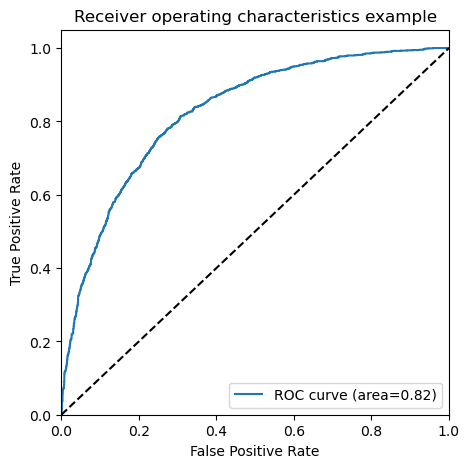

In [143]:
draw_roc(y_train_pred_final.Churn,y_train_pred_final.Churn_Prob)

In [144]:
num=[float(i)/10 for i in range(10)]
for i in num:
    y_train_pred_final[i]=y_train_pred_final.Churn_Prob.map(lambda x: 1 if x>i else 0)

In [145]:
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.149505,879,0,1,1,0,0,0,0,0,0,0,0
1,0,0.096371,5790,0,1,0,0,0,0,0,0,0,0,0
2,1,0.699693,6498,1,1,1,1,1,1,1,1,0,0,0
3,1,0.760768,880,1,1,1,1,1,1,1,1,1,0,0
4,1,0.757702,2784,1,1,1,1,1,1,1,1,1,0,0


In [146]:
y_train_pred_final.columns

Index([     'Churn', 'Churn_Prob',     'CustID',  'predicted',          0.0,
                0.1,          0.2,          0.3,          0.4,          0.5,
                0.6,          0.7,          0.8,          0.9],
      dtype='object')

In [150]:
cutoff_df=pd.DataFrame(columns=["prob","accuracy","sensi","specs"])
from sklearn.metrics import confusion_matrix

num=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1=metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i])
    
    total1=sum(sum(cm1))
    accuracy=(cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    cutoff_df.loc[i] = [i, accuracy,speci,sensi]
print(cutoff_df)

     prob  accuracy     sensi     specs
0.0   0.0  0.261479  0.000000  1.000000
0.1   0.1  0.554856  0.417331  0.943279
0.2   0.2  0.703779  0.656396  0.837607
0.3   0.3  0.760260  0.776891  0.713287
0.4   0.4  0.785859  0.851719  0.599845
0.5   0.5  0.791548  0.910316  0.456099
0.6   0.6  0.790735  0.953783  0.330225
0.7   0.7  0.768590  0.983219  0.162393
0.8   0.8  0.749898  0.996974  0.052059
0.9   0.9  0.738521  1.000000  0.000000


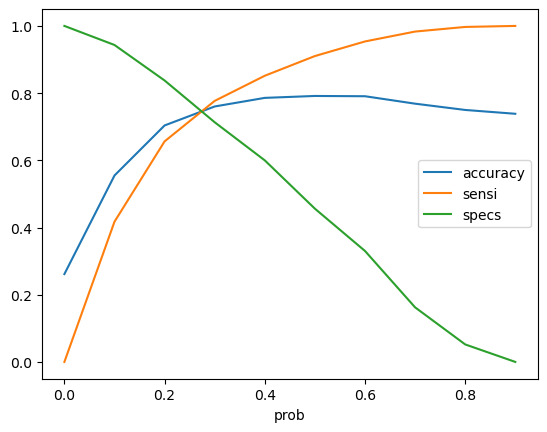

In [151]:
cutoff_df.plot.line(x="prob",y=["accuracy","sensi","specs"])
plt.show()

In [152]:
y_train_pred_final["final_predicted"]=y_train_pred_final.Churn_Prob.map(lambda x: 1 if x>0.3 else 0)
y_train_pred_final

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.149505,879,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.096371,5790,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.699693,6498,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.760768,880,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.757702,2784,1,1,1,1,1,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4917,0,0.037548,79,0,1,0,0,0,0,0,0,0,0,0,0
4918,0,0.193419,3934,0,1,1,0,0,0,0,0,0,0,0,0
4919,0,0.048928,5964,0,1,0,0,0,0,0,0,0,0,0,0
4920,0,0.088737,6947,0,1,0,0,0,0,0,0,0,0,0,0


In [153]:
metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.final_predicted)

0.7602600568874441

In [154]:
confusion2=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.final_predicted)
confusion2

array([[2824,  811],
       [ 369,  918]], dtype=int64)

In [156]:
TP=confusion2[1,1]
TN=confusion2[0,0]
FP=confusion2[0,1]
FN=confusion2[1,0]

In [157]:
TP/float(TP+FN)

0.7132867132867133

In [158]:
TN/float(TN+FP)

0.7768913342503438

In [159]:
TP/float(TP+FP)

0.5309427414690573

In [160]:
FP/float(TN+FP)

0.22310866574965613

In [161]:
TN/float(TN+FN)

0.8844347009082367

In [162]:
confusion

array([[3309,  326],
       [ 700,  587]], dtype=int64)

In [163]:
confusion[1,1]/(confusion[1,1]+confusion[0,1])

0.6429353778751369

In [164]:
metrics.precision_score(y_train_pred_final.Churn,y_train_pred_final.final_predicted)

0.5309427414690573

In [165]:
metrics.precision_score(y_train_pred_final.Churn,y_train_pred_final.predicted)

0.6429353778751369

## Precison recall curve

In [170]:
from sklearn.metrics import precision_recall_curve

In [171]:
help(precision_recall_curve)

Help on function precision_recall_curve in module sklearn.metrics._ranking:

precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None, drop_intermediate=False)
    Compute precision-recall pairs for different probability thresholds.
    
    Note: this implementation is restricted to the binary classification task.
    
    The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
    true positives and ``fp`` the number of false positives. The precision is
    intuitively the ability of the classifier not to label as positive a sample
    that is negative.
    
    The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
    true positives and ``fn`` the number of false negatives. The recall is
    intuitively the ability of the classifier to find all the positive samples.
    
    The last precision and recall values are 1. and 0. respectively and do not
    have a corresponding threshold. This ensures that the graph starts o

In [176]:
p,r,thresholds=precision_recall_curve(y_train_pred_final.Churn,y_train_pred_final.Churn_Prob)

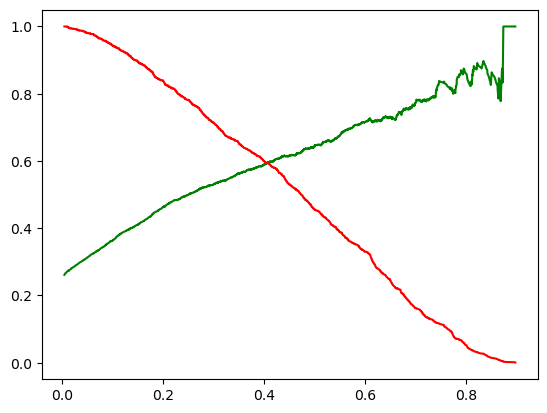

In [177]:
plt.plot(thresholds,p[:-1],"g-")
plt.plot(thresholds,r[:-1],"r-")

## Making predictions on test set

In [178]:
X_test[["tenure","MonthlyCharges","TotalCharges"]]=scaler.transform(X_test[["tenure","MonthlyCharges","TotalCharges"]])

In [179]:
col

Index(['tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [188]:
X_test=X_test[col]

In [189]:
X_test

,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,-0.347623,1,0.499951,-0.128378,0,False,False,True,False,True,False,False,False,False,True
3730,0.999203,1,1.319685,1.600302,0,False,False,True,False,True,False,True,False,True,True
1761,1.040015,1,-1.342374,-0.343297,0,False,True,True,False,False,True,True,False,False,False
2283,-1.286319,1,0.223935,-0.979170,0,False,False,False,True,True,False,False,False,False,False
1872,0.346196,0,-1.500335,-0.656086,0,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1.244080,0,0.132483,0.802182,0,True,False,False,False,False,False,True,True,False,False
3508,1.529770,1,1.623968,2.490097,0,False,True,False,False,True,False,True,True,True,True
6765,1.488957,1,-1.304131,-0.272833,0,False,True,False,False,False,True,True,False,False,False
3598,-1.286319,0,-0.615753,-0.990304,1,False,False,False,False,False,False,False,False,False,False


In [190]:
X_test_sm=sm.add_constant(X_test)

In [204]:
col

Index(['tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [192]:
y_test_pred=res.predict(X_test_sm[col].select_dtypes(include=["float","int"]))

In [193]:
y_test_pred

942     0.373280
3730    0.232208
1761    0.011689
2283    0.604996
1872    0.111488
          ...   
1289    0.159109
3508    0.215871
6765    0.005296
3598    0.888179
4987    0.017407
Length: 2110, dtype: float64

In [198]:
y_test_1=pd.DataFrame(y_test)

In [199]:
y_test_1["CustID"]=y_test_1.index

In [200]:
y_test_1

,Churn,CustID
942,0,942
3730,1,3730
1761,0,1761
2283,1,2283
1872,0,1872
...,...,...
1289,0,1289
3508,0,3508
6765,0,6765
3598,0,3598


In [202]:
y_pred_1=pd.DataFrame(y_test_pred)

In [203]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_1.reset_index(drop=True, inplace=True)

In [205]:
y_pred_final=pd.concat([y_test_1,y_pred_1],axis=1)

In [206]:
y_pred_final=y_pred_final.rename(columns={0:"Churn_Prob"})

In [207]:
help(y_pred_final.reindex)

Help on method reindex in module pandas.core.frame:

reindex(labels=None, *, index=None, columns=None, axis: 'Axis | None' = None, method: 'str | None' = None, copy: 'bool | None' = None, level: 'Level | None' = None, fill_value: 'Scalar | None' = nan, limit: 'int | None' = None, tolerance=None) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Conform DataFrame to new index with optional filling logic.
    
    Places NA/NaN in locations having no value in the previous index. A new object
    is produced unless the new index is equivalent to the current one and
    ``copy=False``.
    
    Parameters
    ----------
    
    labels : array-like, optional
        New labels / index to conform the axis specified by 'axis' to.
    index : array-like, optional
        New labels for the index. Preferably an Index object to avoid
        duplicating data.
    columns : array-like, optional
        New labels for the columns. Preferably an Index object to avoid
        duplic

In [208]:
y_pred_final=y_pred_final.reindex(["CustID","Churn","Churn_Prob"],axis=1)

In [209]:
y_pred_final

,CustID,Churn,Churn_Prob
0,942,0,0.373280
1,3730,1,0.232208
2,1761,0,0.011689
3,2283,1,0.604996
4,1872,0,0.111488
...,...,...,...
2105,1289,0,0.159109
2106,3508,0,0.215871
2107,6765,0,0.005296
2108,3598,0,0.888179


In [210]:
y_pred_final["final_predicted"]=y_pred_final.Churn_Prob.map(lambda x: 1 if x>0.3 else 0 )

In [211]:
confusion3=metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted)

In [212]:
confusion3

array([[753, 775],
       [ 84, 498]], dtype=int64)

In [214]:
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.5928909952606635

## Summary

Today we implemented the confusion matrix on both the X_train and y_test and saw how much the actual churn and predicted churn are different from each other. We also saw that the specificity and sensitivity increases and decreases in X_train and y_test. we also found the precision and recall for the confusion matrix using the churn, customer and internet data.